# Classificação KNN

É um algoritmo que faz o cálculo baseado na proximidade dos dados. Para realizar este algoritmo precisamos:
* Dados de treinamento;
* Definir a métrica para cálculo da distância;
* Definir o valor de K (número de vizinhos mais próximos que serão considerados pelo algoritmo).

<img src="assets/knn01.png"/>

O KNN é um dos algoritmos mais simples para Machine Learning, sendo um algoritmo do tipo "lazy", ou seja, nenhuma computação é realizada no dataset até que um novo ponto de dado seja alvo de teste. Considera-se o voto majoritário entre os rótulos de classe dos K vizinhos mais próximos. Existem várias formas de medir a distância entre o ponto desconhecido e os pontos dos K vizinhos mais próximos:
* **Distância Euclidiana**: É a opção padrão para medir dados numéricos.
É a opção padrão e trata todos os atributos de forma igual. Uma desvantagem dessa medida é a sensibilidade a valores extremos, os outliers.
* **Distância Manhattan**: É a distância medida de dois pontos através dos ângulos de X e Y.
* **Distância Minkowski**: É a generalização da distância Euclidiana.
* **Distância de Hamming**: É a opção padrão para lidar com dados categóricos. Se os dados forem diferentes, a distância é zero. Caso contrário, a distância é um.

Os dados devem estar normalizados antes de aplicar o algoritmo.

**Dicas de quando utilizar cada tipo de medida:**<br/>

<img src="assets/knn02.png"/>


**Como funciona o algoritmo KNN**<br/>
O algoritmo KNN utiliza medidas de distância a fim de comparar os pontos de dados.
O tamanho de cada célula Voronoi é determinado pelo número de exemplos disponíveis no dataset de treino.

<img src="assets/knn03.png"/>

Um aspecto interessante dessa separação por células é que existe uma fronteira que forma a separação entre as classes de dados.
Essa técnica é muito sensível a outliers e uma forma de combater isso é definir a quantidade de k-vizinhos mais próximos corretamente.

**Vantagens e Desvantagens**<br/>
	É um dos algoritmos mais simples em python, é necessário padronizar e normalizar os dados. O KNN não cria o modelo, ele aplica todas as regras na hora da classificação.

**Vantagens:**
* Rápido treinamento;
* Capaz de aprender funções complexas;
* Não perde/desperdiça informação
* Bastante flexível;
* Em alguns casos pode apresentar bons resultados.

**Desvantagens:**
* Classificar um exemplo desconhecido pode ser um processo computacionalmente complexo, pois requer um cálculo de distância para cada exemplo de treinamento.
Lento para realizar uma consulta;
* A precisão de classificação pode ser severamente degradada pela presença de ruído ou característica irrelevantes;
* Não constrói um modelo de classificação.


Veremos agora não apenas o KNN, mas também a influência das dimensões em processos de classificação. Utilizaremos o dataset de dígitos fornecido pelo Scikit-learn.

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [1]:
# Carrega os pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.model_selection
import sklearn.decomposition
import sklearn.model_selection
import sklearn.neighbors
import sklearn.metrics

In [2]:
# Gera o dataset
digitos = sklearn.datasets.load_digits()

<Figure size 432x288 with 0 Axes>

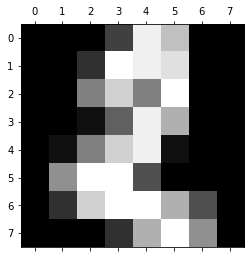

In [3]:
# Plot de um dos itens do dataset
plt.gray() 
plt.matshow(digitos.images[2]) 
plt.show() 

In [4]:
# Gera X e Y
X = digitos.data
Y = digitos.target

In [5]:
# Formato de X e Y
print(X.shape, Y.shape)

(1797, 64) (1797,)


In [6]:
# Cross Validation para gerar os datasets de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = sklearn.model_selection.train_test_split (X, Y, test_size = 0.33, random_state = 101)

In [7]:
# Normalização dos dados pela Média

# Cálculo da média do dataset de treino
X_norm = np.mean(X_treino, axis = 0)

# Normalização dos dados de treino e de teste
X_treino_norm = X_treino - X_norm
X_teste_norm = X_teste - X_norm

In [8]:
# Shape dos datasets
print(X_treino_norm.shape, X_teste_norm.shape, Y_treino.shape, Y_teste.shape)

(1203, 64) (594, 64) (1203,) (594,)


In [9]:
# Single Value Decompositon (SVD) - Redução de Dimensionalidade
# Redução de Componentes Linear, similar ao PCA
svd = sklearn.decomposition.TruncatedSVD(n_components = 2)
X_2d = svd.fit_transform(X_treino_norm)

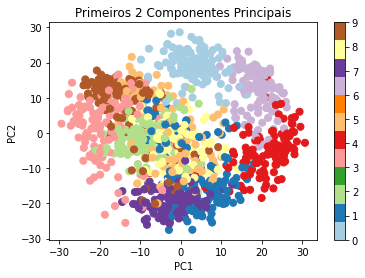

In [10]:
# Plot dos 2 primeiros Componentes Principais
plt.scatter(X_2d[:,0], X_2d[:,1], c = Y_treino, s = 50, cmap = plt.cm.Paired)
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Primeiros 2 Componentes Principais')
plt.show()

In [11]:
# Função para testar o melhor valor de K
def compute_teste (x_teste, y_teste, clf, cv):
    KFolds = sklearn.model_selection.KFold(n_splits = cv)
    
    scores = []
    
    for i, j in KFolds.split(x_teste):
        test_set = x_teste[j]
        test_labels = y_teste[j]
        scores.append(sklearn.metrics.accuracy_score(test_labels, clf.predict(test_set)))
    return scores

In [12]:
# Definição de parâmetros
k = np.arange(20) + 1
parametros = {'n_neighbors':k}

In [13]:
# Construção do Modelo KNN
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
modelo = sklearn.neighbors.KNeighborsClassifier()

In [14]:
modelo.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [15]:
# Grid Search para Cross Validation com o melhor valor de K
modeloKNN = sklearn.model_selection.GridSearchCV(modelo, parametros, cv = 10)

In [16]:
modeloKNN.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})>

In [17]:
# Listas vazias que vão receber os scrores de acurária e os parâmetros resultados do modelo
acuracia = []
params = []

In [18]:
# Lista de dimensões
dimensoes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [19]:
# Implementação do modelo
for d in dimensoes:
    svd = sklearn.decomposition.TruncatedSVD(n_components = d)
    
    if d < 64:
        X_fit_treino = svd.fit_transform(X_treino)
        X_fit_teste = svd.transform(X_teste)
    else:
        X_nl = X_treino
        X_nl1 = X_teste
        
    modeloKNN.fit(X_fit_treino, Y_treino)
    
    acuracia.append(compute_teste(x_teste = X_fit_teste, y_teste = Y_teste, clf = modeloKNN, cv = 10))
    params.append(modeloKNN.best_params_['n_neighbors'])

In [20]:
# A acurácia aumenta à medida que usamos mais dimensões para o modelo de classificação
for cv in acuracia:
    print(round(np.mean(cv)*100, 2))

13.12
41.08
65.82
78.62
85.69
92.92
93.43
93.77
95.79
96.47


## Alterando Parâmetros do Modelo

In [21]:
# Alterando parâmetros do modelo
modelo_v2 = sklearn.neighbors.KNeighborsClassifier(metric = 'hamming')
modeloKNN_v2 = sklearn.model_selection.GridSearchCV(modeloKNN, parametros, cv = 10)

In [22]:
modelo_v2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'hamming',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [23]:
# Listas vazias que vão receber os scrores de acurária e os parâmetros resultados do modelo
acuracia = []
params = []

# Lista de dimensões
dimensoes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [24]:
# Implementação do modelo
for d in dimensoes:
    svd = sklearn.decomposition.TruncatedSVD(n_components = d)
    
    if d < 64:
        X_fit_treino = svd.fit_transform(X_treino)
        X_fit_teste = svd.transform(X_teste)
    else:
        X_nl = X_treino
        X_nl1 = X_teste
        
    modelo_v2.fit(X_fit_treino, Y_treino)
    
    acuracia.append(compute_teste(x_teste = X_fit_teste, y_teste = Y_teste, clf = modelo_v2, cv = 10))

In [25]:
acuracia

[[0.18333333333333332,
  0.08333333333333333,
  0.13333333333333333,
  0.13333333333333333,
  0.05084745762711865,
  0.0847457627118644,
  0.06779661016949153,
  0.1016949152542373,
  0.0847457627118644,
  0.06779661016949153],
 [0.08333333333333333,
  0.05,
  0.13333333333333333,
  0.13333333333333333,
  0.1016949152542373,
  0.05084745762711865,
  0.06779661016949153,
  0.1016949152542373,
  0.06779661016949153,
  0.1016949152542373],
 [0.18333333333333332,
  0.08333333333333333,
  0.13333333333333333,
  0.13333333333333333,
  0.05084745762711865,
  0.0847457627118644,
  0.06779661016949153,
  0.1016949152542373,
  0.0847457627118644,
  0.06779661016949153],
 [0.18333333333333332,
  0.08333333333333333,
  0.13333333333333333,
  0.13333333333333333,
  0.05084745762711865,
  0.0847457627118644,
  0.06779661016949153,
  0.1016949152542373,
  0.0847457627118644,
  0.06779661016949153],
 [0.08333333333333333,
  0.05,
  0.11666666666666667,
  0.08333333333333333,
  0.0847457627118644,
  0.